# Rakuten Data Exploration

## Importing text data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

sns.set()

### Features variables

In [2]:
df_X = pd.read_csv('./datasets/X_train_update.csv', index_col = 0)

print("nb_entries, nb_columns = ", df_X.shape)
display(df_X.head())

nb_entries, nb_columns =  (84916, 4)


,designation,description,productid,imageid
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786


### Target variable

In [3]:
df_y = pd.read_csv('./datasets/Y_train_CVw08PX.csv', index_col = 0)

print(print("nb_entries, nb_columns = ", df_y.shape))
display(df_y.head())

nb_entries, nb_columns =  (84916, 1)
None


,prdtypecode
0,10
1,2280
2,50
3,1280
4,2705


### Merged dataset

In [4]:
df = pd.concat([df_y,df_X], axis = 1)

## Rename the variable 'designation' by 'title' which is more convenient
df.rename({'designation':'title'}, axis = 1, inplace = True)

df.head()

,prdtypecode,title,description,productid,imageid
0,10,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046
1,2280,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237
2,50,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978
3,1280,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496
4,2705,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786


### Product Class dataframe 

In [5]:
product_class = pd.read_csv('./datasets/product_class.csv', sep = ';')
product_class.drop('target', axis = 1, inplace = True) 
display(product_class)

,prdtypecode,prodtype
0,10,livres_adulte
1,40,jeux_videos_import
2,50,accessoires_jeux_videos
3,60,jeux_et_consoles_retro
4,1140,goodies_geek
5,1160,cartes_a_jouer
6,1180,figurines_wargames
7,1280,jouets_enfance
8,1281,jeux_societe
9,1300,modeles_reduits_ou_telecommandes


## Data Exploration
* Variable types, role (feature/target), nature (cathegorical/quantitative).  
* Percentage of missing values  
* Distribution of values for quantitative variables: Statistical description.  
* Relevant cathegories of Cathegorical variables.  

### Target variable: Product type code

In [6]:
## unique categories represented in the df_X dataset
df['prdtypecode'].unique().shape[0]

27

In [7]:
## most represented product type codes and number of products in each one (counts)
top_categories = df['prdtypecode'].value_counts().sort_values(ascending = False).head(10)
top_categories = top_categories.to_frame('counts')
top_categories.index.name = 'prdtypecode'
display(top_categories)

,counts
prdtypecode,
2583,10209
1560,5073
1300,5045
2060,4993
2522,4989
1280,4870
2403,4774
2280,4760
1920,4303


**Visualization**  

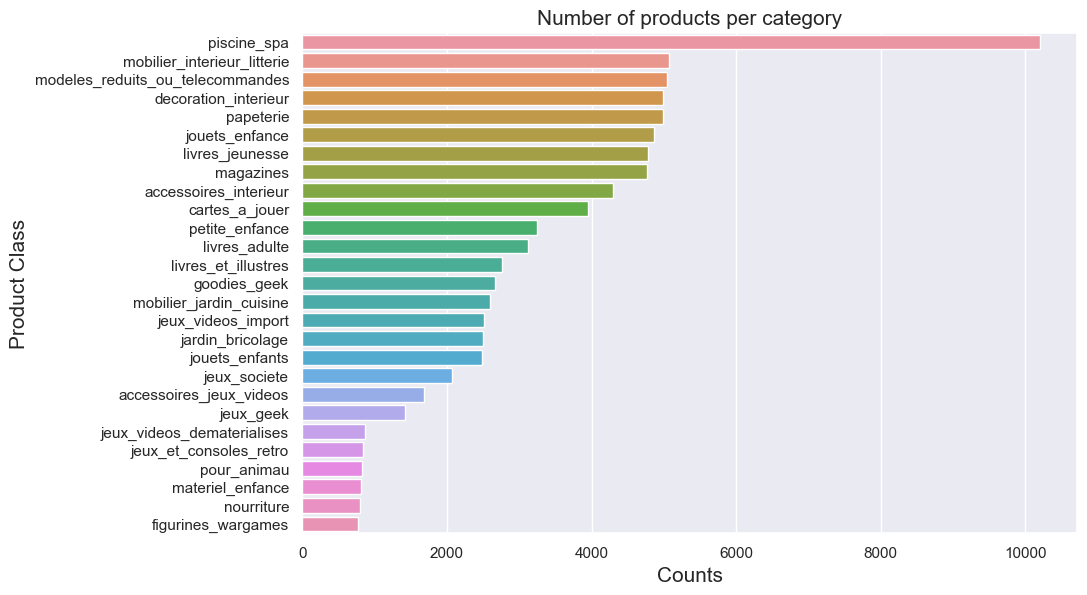

In [8]:
## Counts per cathegory in the whole train dataset.
fsizeL = 15

class_codes = df['prdtypecode'].value_counts().index
class_labels = [ product_class.loc[product_class['prdtypecode']==code,'prodtype'].iloc[0] for code in class_codes]


f, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,6.5))
sns.countplot(y = 'prdtypecode', data = df , order = class_codes)#df['prdtypecode'].value_counts().index

# set product labels
ax.set_yticklabels(class_labels)

plt.ylabel('Product Class', fontsize = fsizeL)
plt.xlabel('Counts', fontsize = fsizeL)
plt.title('Number of products per category', fontsize = fsizeL )
plt.show();

### Feature variables: datatypes & missing values

In [9]:
## Let's see the variable types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84916 entries, 0 to 84915
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   prdtypecode  84916 non-null  int64 
 1   title        84916 non-null  object
 2   description  55116 non-null  object
 3   productid    84916 non-null  int64 
 4   imageid      84916 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 3.9+ MB


In [10]:
## The only feature with missing values is 'descriptionid'

## Amount of missing values in the 'descriptionid':
nb_missingDescr = df['description'].isna().sum()

print(f'There are {nb_missingDescr} ({round(nb_missingDescr/df.shape[0]*100,2)} %) elements without a description')

There are 29800 (35.09 %) elements without a description


**Distribution of products with missing 'description' among categories.**

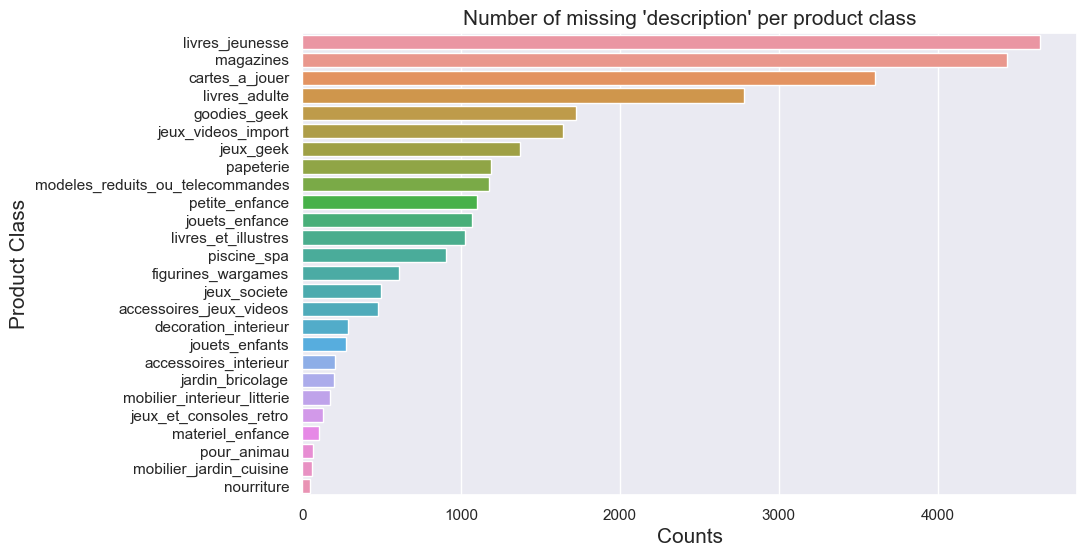

In [11]:
## subset with missing description
df_missing = df[df['description'].isna()]
class_codes = df_missing['prdtypecode'].value_counts().index
class_labels = [ product_class.loc[product_class['prdtypecode']==code,'prodtype'].iloc[0] for code in class_codes]


## plot
fsizeL = 15
f, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,6))

sns.countplot(y = 'prdtypecode', data = df_missing , order = class_codes)#df['prdtypecode'].value_counts().index

# Set product labels
ax.set_yticklabels(class_labels)

plt.ylabel('Product Class', fontsize = fsizeL)
plt.xlabel('Counts', fontsize = fsizeL)
plt.title("Number of missing 'description' per product class", fontsize = fsizeL )
plt.show();

### Feature engineering: title_descr

In [12]:
## Replace NaN's in description with empty string
df['description'] = df['description'].fillna('')

## Concatenate 'title' with 'description'
df['title_descr'] = df['title'] + '\n' + df['description']

df.head()

,prdtypecode,title,description,productid,imageid,title_descr
0,10,Olivia: Personalisiertes Notizbuch / 150 Seite...,,3804725264,1263597046,Olivia: Personalisiertes Notizbuch / 150 Seite...
1,2280,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,,436067568,1008141237,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...
2,50,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978,Grand Stylet Ergonomique Bleu Gamepad Nintendo...
3,1280,Peluche Donald - Europe - Disneyland 2000 (Mar...,,50418756,457047496,Peluche Donald - Europe - Disneyland 2000 (Mar...
4,2705,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786,La Guerre Des Tuques\nLuc a des id&eacute;es d...


In [13]:
## check the first element having a concatenation with empty string.
print(df[df['description']==''].loc[0,'title'])
print(df[df['description']==''].loc[0,'description'])
print(df[df['description']==''].loc[0,'title_descr'])

Olivia: Personalisiertes Notizbuch / 150 Seiten / Punktraster / Ca Din A5 / Rosen-Design

Olivia: Personalisiertes Notizbuch / 150 Seiten / Punktraster / Ca Din A5 / Rosen-Design



### Exploring Text format and tokenization

In [14]:
import nltk
#nltk.download()   ## pop-up a window to select which package to download
#nltk.download('popular')   ## download package 'popular'
from nltk.tokenize import word_tokenize

## Try for one example
idx_example = 4

print("Verify concatenation: title + description: \n------------------------------------------")
print("Title: \n\t", df.loc[idx_example,'title'],'\n')
print("Description: \n\t", df.loc[idx_example,'description'],'\n')
print("HTML encoded text: \n-----------------")
print(df.loc[idx_example,'title_descr'],'\n')

print('\n\n')

print("Tokenize text and count tokens: \n-------------------------------")
print("Token length = ", len(word_tokenize(df.loc[idx_example,'title_descr'])))
print("Tokens = ", word_tokenize(df.loc[idx_example,'title_descr']))

print('\n\n')

print("HTML parsed text: \n-----------------")
from bs4 import BeautifulSoup
soup = BeautifulSoup(df.loc[idx_example,'title_descr'])
print(soup.get_text(),'\n')

print("Token length = ", len(word_tokenize(soup.get_text())) )
print("Tokens in HTML parsed text: \n", word_tokenize(soup.get_text()))

print('\n\n')

print("tokenize with regex (remove puntuations): \n---------------------------------")
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

print("Token length = ", len(tokenizer.tokenize(df.loc[idx_example,'title_descr'])))
print("Regex Tokenization of Text: \n", tokenizer.tokenize(df.loc[idx_example,'title_descr']) , '\n' )

print("Token length = ", len(tokenizer.tokenize(soup.get_text()) ) )      
print("Regex Tokenization of HTML parsed text: \n", tokenizer.tokenize(soup.get_text()) , '\n'  )


Verify concatenation: title + description: 
------------------------------------------
Title: 
	 La Guerre Des Tuques 

Description: 
	 Luc a des id&eacute;es de grandeur. Il veut organiser un jeu de guerre de boules de neige et s'arranger pour en &ecirc;tre le vainqueur incontest&eacute;. Mais Sophie s'en m&ecirc;le et chambarde tous ses plans... 

HTML encoded text: 
-----------------
La Guerre Des Tuques
Luc a des id&eacute;es de grandeur. Il veut organiser un jeu de guerre de boules de neige et s'arranger pour en &ecirc;tre le vainqueur incontest&eacute;. Mais Sophie s'en m&ecirc;le et chambarde tous ses plans... 




Tokenize text and count tokens: 
-------------------------------
Token length =  55
Tokens =  ['La', 'Guerre', 'Des', 'Tuques', 'Luc', 'a', 'des', 'id', '&', 'eacute', ';', 'es', 'de', 'grandeur', '.', 'Il', 'veut', 'organiser', 'un', 'jeu', 'de', 'guerre', 'de', 'boules', 'de', 'neige', 'et', "s'arranger", 'pour', 'en', '&', 'ecirc', ';', 'tre', 'le', 'vainqueur', 'i

**Observations**
* text is HTML encoded (from webscrapping probably)----->> Need to parse to get rid off: 
     * tags words 
     * encoded characters such that ('id', '&', 'eacute', ';', 'es') is understood as 'idées' (idx_example = 4)
* word_tokenize separate punctuation symbols from words even if no space between them (good)
* understand date format as a single token (good)
* considers elided words as a single token such as "de"+"art" = "d'art". Also the case for "l'écran"
* concatenated words by '-' are a single token such as 'SL-3468-BE'

**To do:**   
[x] does not recognize tag '< br>' (without the inner space) as line break in the description: replace HTML tag by string linebreak '\n' before tokenizing

[x] Are there tags frequent in descripton ? to justify the HTML parsing ?

### Are there HTML tags ?

In [15]:
import re
idx = 2
s1 = df.loc[idx,'title_descr']
s1
pattern = '<br>'

html_top_tags = ['&nbsp','ol','i','u','s','sub','sup','em','br', 'b', 'div', 'p', 'a', 'img', 'ul', 'li',\
             'h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'span', 'table', 'tr', 'td', 'th']
html_fr_special_letters = ['&eacute;','&egrave;','&ecirc;','&agrave;','&ccedil;','&euml;','&icirc;','&iuml;','&ocirc;',\
                           '&ucirc;','&oelig;']

html_tags = html_top_tags + html_fr_special_letters

cnt = 0 
for text in df.loc[:,'title_descr']:
    for tag in html_tags:
        pattern = '<' + tag
        result  = re.search(pattern, text)
        if result:
            cnt = cnt + 1
print(cnt)

47382


In [16]:
#### number of items that have at least on html tag

def has_html_tag(text):
    cnt = 0
    for tag in html_tags:
        pattern = '<' + tag
        result  = re.search(pattern, text)
        if result:
            cnt += 1
        
    if cnt >= 1:
        return True
    else:
        return False
    
## subset df into an axiliar dataframe
df['has_html'] = [ has_html_tag(text) for text in df['title_descr'] ]
df.head()


,prdtypecode,title,description,productid,imageid,title_descr,has_html
0,10,Olivia: Personalisiertes Notizbuch / 150 Seite...,,3804725264,1263597046,Olivia: Personalisiertes Notizbuch / 150 Seite...,False
1,2280,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,,436067568,1008141237,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,False
2,50,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,True
3,1280,Peluche Donald - Europe - Disneyland 2000 (Mar...,,50418756,457047496,Peluche Donald - Europe - Disneyland 2000 (Mar...,False
4,2705,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786,La Guerre Des Tuques\nLuc a des id&eacute;es d...,False


In [17]:
## value counts
df['has_html'].sum()

15501

In [18]:
bar_labels = [ str(round(val*100, 2))+' %' for val in df['has_html'].value_counts(normalize=True).values]
bar_labels

['81.75 %', '18.25 %']

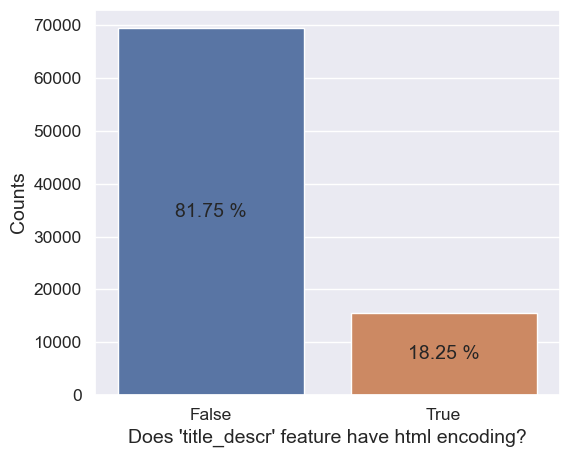

In [19]:

f, ax = plt.subplots(1,1, figsize = (6,5) )
sns.countplot(x = 'has_html', data = df) 

## anotations
fsize = 14
ax.bar_label(ax.containers[0], labels = bar_labels, label_type='center', fontsize = fsize)
plt.ylabel('Counts', fontsize = fsize)
plt.xlabel("Does 'title_descr' feature have html encoding?", fontsize = fsize)
plt.xticks(fontsize = fsize-1.5)
plt.yticks(fontsize = fsize-1.5);

**Nb of tags found: including french special character html encoding**  =  47382


**Nb of items with 1,2 or3 tags in their description:**  
- 15500 with one tag  
- 14349 with two tags  
- 7935 with three tags  

### Feature Engineering: word_length
1- HTML parse Text and lower case.  
2- Tokenize with RegexpTokenizer.  
3- Measure Token length.  

In [23]:
df.columns

Index(['prdtypecode', 'title', 'description', 'productid', 'imageid',
       'title_descr', 'has_html'],
      dtype='object')

In [26]:
### HTML parse Text and lower case all
from bs4 import BeautifulSoup
import time
start_time = time.time()

df['title_descr'] = [BeautifulSoup(text).get_text().lower() for text in df.loc[:,'title_descr']]

print("HTML parsing the whole dataset takes %0.2f s" %(time.time() - start_time) )

C:\Users\19rod\AppData\Local\Temp\ipykernel_28148\1147848927.py:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  df['title_descr'] = [BeautifulSoup(text).get_text().lower() for text in df.loc[:,'title_descr']]


HTML parsing the whole dataset takes 5.33 s


In [27]:
# verify
df.loc[4,'title_descr']

"la guerre des tuques\nluc a des idées de grandeur. il veut organiser un jeu de guerre de boules de neige et s'arranger pour en être le vainqueur incontesté. mais sophie s'en mêle et chambarde tous ses plans..."

In [29]:
## Regexp Tokenization: get token list and Nb_of tokens
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

start_time = time.time()

df['tokens'] = [tokenizer.tokenize(soup_text) for soup_text in df.loc[:,'title_descr']]
df['text_token_len'] = [len(token_list) for token_list in df['tokens'] ]

print("Tokenizing the whole dataset takes %0.2f s" %(time.time() - start_time) )

Tokenizing the whole dataset takes 4.77 s


In [30]:
## verify
idx = 4
print(df.loc[idx,'title_descr'],'\n')
print(df.loc[idx,'tokens'],'\n')
print(df.loc[idx,'text_token_len'],'\n')

la guerre des tuques
luc a des idées de grandeur. il veut organiser un jeu de guerre de boules de neige et s'arranger pour en être le vainqueur incontesté. mais sophie s'en mêle et chambarde tous ses plans... 

['la', 'guerre', 'des', 'tuques', 'luc', 'a', 'des', 'idées', 'de', 'grandeur', 'il', 'veut', 'organiser', 'un', 'jeu', 'de', 'guerre', 'de', 'boules', 'de', 'neige', 'et', 's', 'arranger', 'pour', 'en', 'être', 'le', 'vainqueur', 'incontesté', 'mais', 'sophie', 's', 'en', 'mêle', 'et', 'chambarde', 'tous', 'ses', 'plans'] 

40 



In [31]:
df.head()

,prdtypecode,title,description,productid,imageid,title_descr,has_html,tokens,text_token_len
0,10,Olivia: Personalisiertes Notizbuch / 150 Seite...,,3804725264,1263597046,olivia: personalisiertes notizbuch / 150 seite...,False,"[olivia, personalisiertes, notizbuch, 150, sei...",11
1,2280,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,,436067568,1008141237,journal des arts (le) n° 133 du 28/09/2001 - l...,False,"[journal, des, arts, le, n, 133, du, 28, 09, 2...",38
2,50,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978,grand stylet ergonomique bleu gamepad nintendo...,True,"[grand, stylet, ergonomique, bleu, gamepad, ni...",120
3,1280,Peluche Donald - Europe - Disneyland 2000 (Mar...,,50418756,457047496,peluche donald - europe - disneyland 2000 (mar...,False,"[peluche, donald, europe, disneyland, 2000, ma...",8
4,2705,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786,la guerre des tuques\nluc a des idées de grand...,False,"[la, guerre, des, tuques, luc, a, des, idées, ...",40


### Feature engineering : Language

In [208]:
#### Uncomment and run the next line to install langid library the first time.
# pip install langid
#### -------------------------------------------------------------------------

### option-1:
# import langid

### option-2: In this way one gets the probability associated with the language detected.
from langid.langid import LanguageIdentifier, model

## instantiate identifier (option-2)
identifier = LanguageIdentifier.from_modelstring(model, norm_probs=True)

In [245]:
## this cell takes approx 5 min to run the 
start_time = time.time()

## apply language identifier
df[['language', 'lang_prob']] = [identifier.classify(text) for text in df['title_descr']]

print("detecting text language on the hole dataset takes %0.2f minutes" %((time.time() - start_time)/60) )
df.head()

detecting text language on the hole dataset takes 5.04 minutes


,prdtypecode,title,description,productid,imageid,title_descr,has_html,tokens,text_token_len,language,lang_prob
0,10,Olivia: Personalisiertes Notizbuch / 150 Seite...,,3804725264,1263597046,olivia: personalisiertes notizbuch / 150 seite...,False,"[olivia, personalisiertes, notizbuch, 150, sei...",11,de,1.0
1,2280,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,,436067568,1008141237,journal des arts (le) n° 133 du 28/09/2001 - l...,False,"[journal, des, arts, le, n, 133, du, 28, 09, 2...",38,fr,1.0
2,50,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978,grand stylet ergonomique bleu gamepad nintendo...,True,"[grand, stylet, ergonomique, bleu, gamepad, ni...",120,fr,1.0
3,1280,Peluche Donald - Europe - Disneyland 2000 (Mar...,,50418756,457047496,peluche donald - europe - disneyland 2000 (mar...,False,"[peluche, donald, europe, disneyland, 2000, ma...",8,fr,1.0
4,2705,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786,la guerre des tuques\nluc a des idées de grand...,False,"[la, guerre, des, tuques, luc, a, des, idées, ...",40,fr,1.0


In [260]:
start_time = time.time()

## Correct language for those with low probability, restrick to english and french only 
from langid.langid import set_languages

## restricted identifier
identifier_2 = LanguageIdentifier.from_modelstring(model, norm_probs=True)
identifier_2.set_languages(langs=['fr','en'])

for i in range(len(df)):    
    if df.loc[i,'lang_prob'] < 0.9999:
        df.loc[i,['language', 'lang_prob']] = identifier_2.classify(df.loc[i,'title_descr'])

# corrected = df[df['lang_prob'] < 0.9999]['title_descr'].apply(identifier_2.classify)
# corrected =[ identifier_2.classify(text) for text in df[df['lang_prob'] < 0.9999]['title_descr'] ]
# df[ df['lang_prob'] < 0.9999 ][['language', 'lang_prob']] = corrected #[[val[0],val[1]] for val in corrected]

    
print("Correcting Languages takes %0.2f seconds" %(time.time() - start_time) )
df.head()

Correcting Languages takes 30.54 seconds


,prdtypecode,title,description,productid,imageid,title_descr,has_html,tokens,text_token_len,language,lang_prob
0,10,Olivia: Personalisiertes Notizbuch / 150 Seite...,,3804725264,1263597046,olivia: personalisiertes notizbuch / 150 seite...,False,"[olivia, personalisiertes, notizbuch, 150, sei...",11,de,1.0
1,2280,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,,436067568,1008141237,journal des arts (le) n° 133 du 28/09/2001 - l...,False,"[journal, des, arts, le, n, 133, du, 28, 09, 2...",38,fr,1.0
2,50,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978,grand stylet ergonomique bleu gamepad nintendo...,True,"[grand, stylet, ergonomique, bleu, gamepad, ni...",120,fr,1.0
3,1280,Peluche Donald - Europe - Disneyland 2000 (Mar...,,50418756,457047496,peluche donald - europe - disneyland 2000 (mar...,False,"[peluche, donald, europe, disneyland, 2000, ma...",8,fr,1.0
4,2705,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786,la guerre des tuques\nluc a des idées de grand...,False,"[la, guerre, des, tuques, luc, a, des, idées, ...",40,fr,1.0


In [261]:
# df[df['lang_prob'] < 0.9999].loc['language', 'lang_prob'] = corrected

df[ df['lang_prob'] < 0.9999 ][['language', 'lang_prob']]

,language,lang_prob
8,fr,0.968107
17,en,0.999657
18,en,0.963995
48,fr,0.601835
50,en,0.99493
...,...,...
84863,en,0.851386
84868,en,0.999203
84896,en,0.98907
84900,fr,0.990752


In [262]:
print(type(corrected))
corrected

<class 'list'>


[('fr', 0.9681072260710829),
 ('fr', 0.9999999999978473),
 ('en', 0.9996565841224135),
 ('en', 0.9639953340909553),
 ('en', 0.9999999992423576),
 ('en', 0.999961518497668),
 ('en', 0.9999998852417243),
 ('fr', 0.6018346818387654),
 ('en', 0.994930459992155),
 ('en', 0.998639796258927),
 ('fr', 0.9999999996349331),
 ('fr', 0.9999995863793184),
 ('fr', 0.9895683603288321),
 ('fr', 0.9999999999358611),
 ('fr', 0.9999963956043961),
 ('fr', 0.9999999999950375),
 ('fr', 0.9999986498047297),
 ('fr', 0.9999999999999472),
 ('en', 0.9999999999916165),
 ('en', 0.5681052121640129),
 ('fr', 0.999999999999325),
 ('en', 0.9998664350679061),
 ('fr', 0.9996790234090729),
 ('fr', 0.9986677172633331),
 ('fr', 0.999708940483196),
 ('en', 0.9650358341337989),
 ('en', 0.956655481346082),
 ('fr', 0.9999999999999982),
 ('en', 0.80587906979144),
 ('en', 0.9999971659578533),
 ('fr', 0.9997445088006813),
 ('fr', 0.9996625553478193),
 ('fr', 0.9998825338612034),
 ('fr', 0.9999908573791081),
 ('fr', 1.0),
 ('en', 

In [263]:
display(df['language'].value_counts(normalize = False).head(7))

lg_order = df['language'].value_counts(normalize = False).head(10).index

lg_counts = df['language'].value_counts(normalize = True).head(10).values*100
lg_pct = [str(round(count,2))+' %' for count in lg_counts]
#print(lg_order,'\n' ,lg_counts, '\n', lg_pct)

fr    72786
en    11513
de      276
it       94
es       47
nl       30
lb       23
Name: language, dtype: int64

Using a for if loop.  
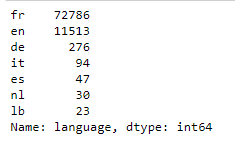


**Visualization**  
[ ] Need to finish  

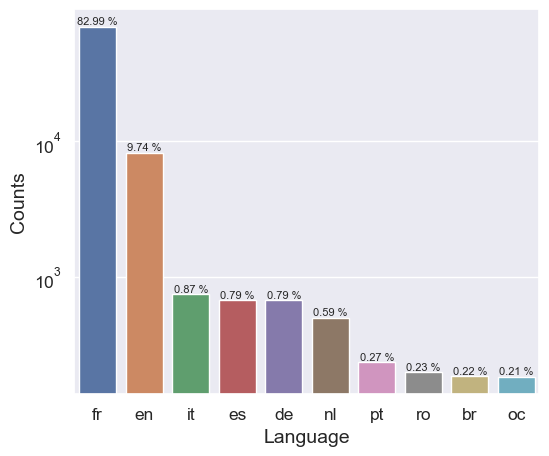

In [242]:
f, ax = plt.subplots(1,1, figsize = (6,5) )
sns.countplot(x = 'language', data = df, order = lg_order) 

## anotations
fsize = 14
ax.bar_label(ax.containers[0], labels = lg_pct, label_type='edge', fontsize = fsize-6)
plt.ylabel('Counts', fontsize = fsize)
plt.xlabel("Language", fontsize = fsize)
plt.xticks(fontsize = fsize-1.5)
plt.yticks(fontsize = fsize-1.5);
plt.yscale("log")

**Verify single items**  
[ ] Delete this part if not needed later

In [202]:
from pandas import option_context  ## to set the length of the dataframe column to display

with option_context('display.max_colwidth', 900):
    lg = 'it'
    display(df[df['language']==lg][['title_descr', 'language', 'lang_prob']].head())
    #df[df['language']=='cy'].loc[25291, 'language']
    #df[df['language']=='cy'].loc[25291, 'title_descr']
    #print(df[df['language']==lg].loc[1137, 'title_descr'])

,title_descr,language,lang_prob
432,piano initial 2018 / recueil\npiano ou clavier / piano -,it,0.999955
1502,marvel comics l'uomo ragno mortalita virtuale parte 1 di 2 n° 196\n,it,1.0
1845,chicco tettarella benessere silicone 4m+ 2pz\n,it,1.0
4691,siege auto viaggio 2-3 flex peg perego (crystal black)\n,it,0.999927
5323,3 n° de tesori d'arte cristiana - ravenna: * 3 mausoleo di galla placidia * 5 basilica di s. vitale * 6 basilica di s. apollinare nuovo...\n,it,1.0


it
3 n° de tesori d'arte cristiana - ravenna: * 3 mausoleo di galla placidia  * 5 basilica di s. vitale  * 6 basilica di s. apollinare nuovo...



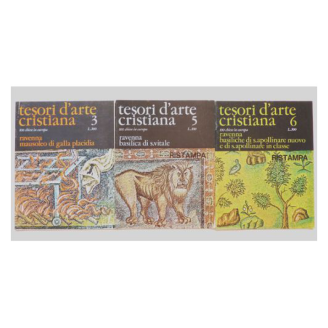

In [265]:
## verify language correctly identified for single cases:

idx = 5323
print(df.loc[idx,'language'])
print(df.loc[idx,'title_descr'])

## load image 
file = "./datasets/image_train/image_"+str(df.loc[idx,'imageid'])+"_product_"+str(df.loc[idx,'productid'])+".jpg"
image = np.int64(cv2.imread(file))

plt.figure(figsize=(4,4))
plt.imshow(image[:,:,::-1])
plt.grid(False)
plt.xticks([]);plt.yticks([]);

In [267]:
img = cv2.imread(file)
print(img.shape)

(500, 500, 3)


**Alternative: Using langdetect**  
Allows to detect several languages and get the probs of each one.

In [204]:
# from langdetect import detect, detect_langs

# #sentence = "olivia: personalisiertes notizbuch / 150 seiten / punktraster / ca din a5 / rosen-design"
# #detect(sentence)

# sen1 = "150 seiten / punktraster / ca din a5 / rosen-design - This is"
# detect_langs(sen1)

## Lematization


In [276]:
# import these modules
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

print("rocks :", lemmatizer.lemmatize("rocks"))
print("corpora :", lemmatizer.lemmatize("corpora"))

# a denotes adjective in "pos"
print("better :", lemmatizer.lemmatize("better", pos ="n"))


rocks : rock
corpora : corpus
better : better


In [278]:
# Define the sentence to be lemmatized
sentence = "The striped bats are hanging on their feet for best"

# Tokenize: Split the sentence into words
word_list = nltk.word_tokenize(sentence)
print(word_list)
#> ['The', 'striped', 'bats', 'are', 'hanging', 'on', 'their', 'feet', 'for', 'best']

# Lemmatize list of words and join
lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
lemmatized_list = [lemmatizer.lemmatize(w) for w in word_list]
print(lemmatized_list)
#> The striped bat are hanging on their foot for best

['The', 'striped', 'bats', 'are', 'hanging', 'on', 'their', 'feet', 'for', 'best']
['The', 'striped', 'bat', 'are', 'hanging', 'on', 'their', 'foot', 'for', 'best']


## Descriptive Statistics

### 'text_token-length' distribution 
Histogram of token-lengh extracted from variable 'title_descr' or  
Distribution of number of tokens in varibale 'tokens'

In [28]:
sns.set(font_scale = 1.25)


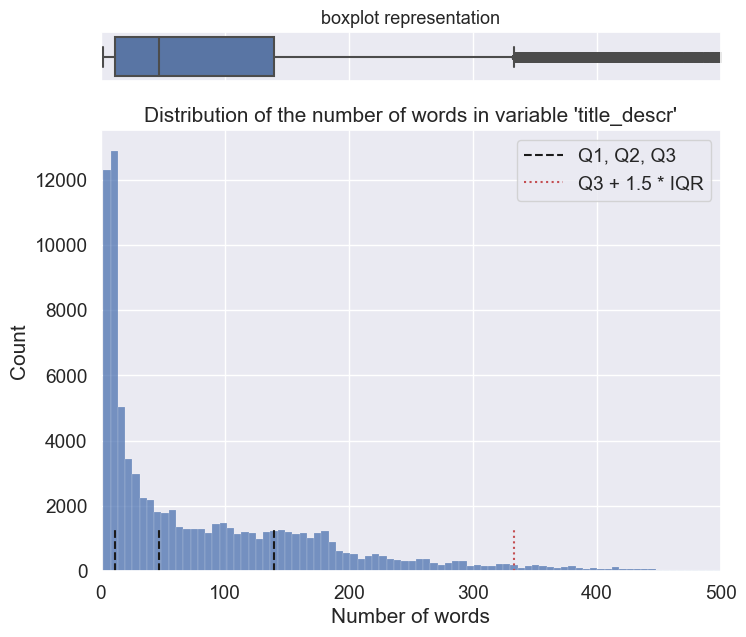

In [29]:
# quantile values
q1, q2, q3 = df['text_token_len'].quantile(q=[0.25,0.5,0.75])
iqr = q3-q1

# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
fsize = 14



fig, (ax_box, ax_hist) = plt.subplots(2, figsize = (8,7), sharex=True, gridspec_kw={"height_ratios": (.1, .9)})
plt.title("Distribution of the number of words in variable 'title_descr'")#, fontsize = fsize)

## Box plot
sns.boxplot(x = df.text_token_len, ax = ax_box)
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
ax_box.set_title('boxplot representation', fontsize = 13)
## hist plot

sns.histplot(x = df.text_token_len, ax = ax_hist)#, kde = True

# add quantiles and extreme values markers
ax_hist.axvline(x=q1, ymin= 0, ymax = 0.1, c='k', ls = '--', label='Q1, Q2, Q3')
ax_hist.axvline(x=q2, ymin= 0, ymax = 0.1, c='k', ls = '--')
ax_hist.axvline(x=q3, ymin= 0, ymax = 0.1, c='k', ls = '--')
ax_hist.axvline(x=q3+1.5*iqr, ymin= 0, ymax = 0.1, c='r', ls = ':', label='Q3 + 1.5 * IQR')
ax_hist.legend()

plt.xlabel('Number of words')
plt.xlim([0,500])
plt.show()

In [30]:
sns.set()  # back to normal

In [31]:
##descriptive statistics
df_stat = pd.DataFrame(df['text_token_len'].describe())
df_stat['text_token_len'] = [round(val,2) for val in df_stat['text_token_len']]
df_stat

,text_token_len
count,84916.00
mean,92.27
std,117.69
min,2.00
25%,11.00
50%,47.00
75%,140.00
max,2141.00


### Data Normality test: QQ plot

The Token-length and the char-length are higly assymetric so probably are not normally distributed.  
There is also no reason for them to be normally distributed.  
Let's probe this with a normality test:  

<Figure size 400x400 with 0 Axes>

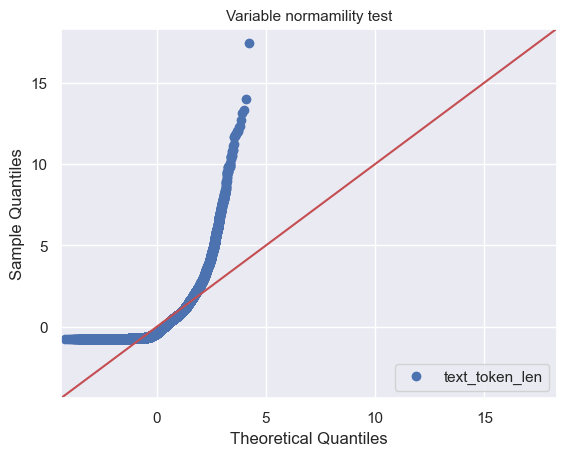

In [32]:
import statsmodels.api as sm

plt.figure( figsize=(4,4) )

sm.qqplot(df['text_token_len'], fit=True, line='45', label ='text_token_len')

plt.title('Variable normamility test', fontsize=11) #, fontweight='bold'
plt.legend(loc ='lower right')
plt.show();

In [33]:
print(f"The Dominant cathegory has prdtypecode 2583 : 'piscine_spa', with about 10k items.")

The Dominant cathegory has prdtypecode 2583 : 'piscine_spa', with about 10k items.


### Correlations

**Is there a correlation between text_token_len (numerical) and prdtypecode (categorical) ??**  
* Lets plot a boxplot for each category
* Let's run an ANOVA test to check

In [34]:
## sort categories by text_token_len mean value (decreasing)
order = df[['prdtypecode','text_token_len']].groupby('prdtypecode')['text_token_len'].mean().sort_values(ascending=False)
order.head()

prdtypecode
2905    363.650229
2060    172.763669
1560    150.772324
2585    142.943109
2582    140.210892
Name: text_token_len, dtype: float64

In [35]:
## get category codes sorted, cast to string to be interpreted as categorical data
order.index

str_order_index = [str(idx) for idx in order.index]
str_order_index[:3]

['2905', '2060', '1560']

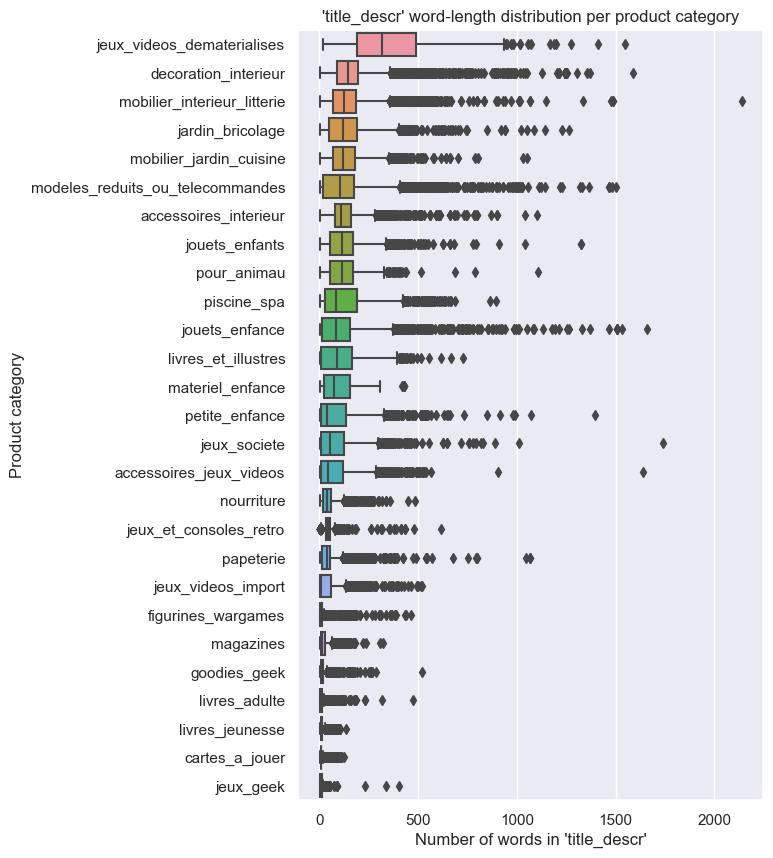

In [36]:
## text_token_len distributions per cathegory.
fsizeL = 15

df_plot = df.copy()
df_plot['prdtypecode'] = df_plot['prdtypecode'].astype(str)
df_plot['text_token_len'] = df_plot['text_token_len'].astype(int)

f, ax = plt.subplots(nrows=1,ncols=1,figsize=(6,10))
sns.boxplot(x ='text_token_len' , y ='prdtypecode', data = df_plot , order = str_order_index)

# set product labels
class_codes = order.index
class_labels = [ product_class.loc[product_class['prdtypecode']==code,'prodtype'].iloc[0] for code in class_codes]
ax.set_yticklabels(class_labels);

plt.title("'title_descr' word-length distribution per product category")
plt.ylabel("Product category")
plt.xlabel("Number of words in 'title_descr'");

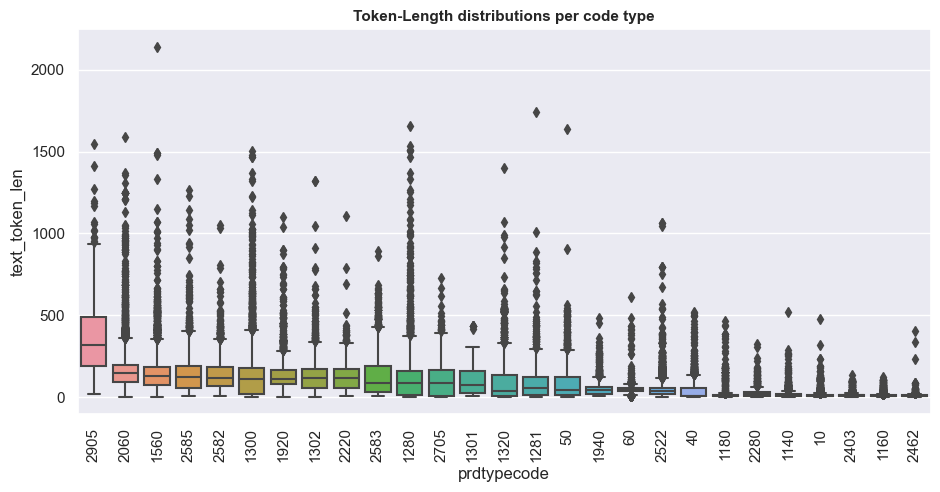

In [37]:
## Same as before but **horizontal**

plt.figure(figsize=(11,5))
plt.title('Token-Length distributions per code type', fontsize=11, fontweight='bold')

sns.boxplot(x = 'prdtypecode', y ='text_token_len', data = df, order = order.index)
plt.xticks(rotation = 90);

# set product labels
class_codes = df['prdtypecode'].value_counts().index
class_labels = [ product_class.loc[product_class['prdtypecode']==code,'prodtype'].iloc[0] for code in class_codes]
#ax.set_yticklabels(class_labels);

## It seems that the type of distribution, the symmetry, the amount of extreme values, depends on the product type code.
## Notice for example products type code 2220 (balanced) vs products type code 10 (skewed).

### ANOVA test
**We can make an hyphoteses (H1) that there are certain type of products for which the description or designation is simpler, so the description is shorter. Hence make the hypothesys that there is a correlation**

In [38]:
H0 = "There is NO correlation between 'text_token_len' and 'prdtypecode'"
H1 = "There is a correlation between  'text_token_len' and 'prdtypecode'"

In [41]:
# Import the library
import statsmodels.api

## Realize the ANOVA test and display the results
## Try 'title_char_len', 'descr_char_len' or 'text_token_len'
result = statsmodels.formula.api.ols('text_token_len ~ prdtypecode', data=df).fit()
table = statsmodels.api.stats.anova_lm(result)

# get p-val an evaluate criteria
display(table)
p_val_anova = table.loc['prdtypecode','PR(>F)']

# evaluation
alpha = 0.05
def p_val_evaluation(p_val, alpha):
    if p_val >= alpha:
        print("H0 is not rejected")
    else:
        print("H0 is rejected, H1 is accepted")

p_val_evaluation(p_val_anova,alpha)
print("ANOVA p-value = ", p_val_anova)

,df,sum_sq,mean_sq,F,PR(>F)
prdtypecode,1.0,2.360973e+07,2.360973e+07,1739.372231,0.0
Residual,84914.0,1.152598e+09,1.357371e+04,NaN,NaN


H0 is rejected, H1 is accepted
ANOVA p-value =  0.0


The p-val = 0 is obtained either we mesure the correlation of 'prdtypecode' with 'text_token_len' or 'descr_char_len'.  
A larger p-val = 39e-13, but still $<$alpha, is obtained when for the correlation with 'title_char_len' 


### Most common words per category
* Aggregate 'tokens' per category
* Remove stop words
* Get most common words

**Create a pool of token per category**

In [42]:
## Create a pool of tokens for each category
cat_tokens = {}
for categ in product_class['prdtypecode']:
    token_pool = []
    
    for token_list in df[df['prdtypecode'] == categ]['tokens']:
        token_pool += token_list  
        
    cat_tokens[str(categ)] = token_pool

Veirfications:

In [43]:
## verify size of 
print("Number of ctagegory pools = ", len(cat_tokens.keys()))
print("Categories :\n ",cat_tokens.keys())

Number of ctagegory pools =  27
Categories :
  dict_keys(['10', '40', '50', '60', '1140', '1160', '1180', '1280', '1281', '1300', '1301', '1302', '1320', '1560', '1920', '1940', '2060', '2220', '2280', '2403', '2462', '2522', '2582', '2583', '2585', '2705', '2905'])


In [44]:
ctg = 1280

## first elements included in the pool
display(df[df['prdtypecode'] == ctg]['tokens'].head(3))

## number of item in this category
display(df[df['prdtypecode'] == ctg]['tokens'].shape)

## tokens of element index = 3 in this category
print(df[df['prdtypecode'] == ctg]['tokens'].loc[3]) 

3     [peluche, donald, europe, disneyland, 2000, ma...
8     [puzzle, scooby, doo, avec, poster, 2x35, pieces]
21    [glitter, beach, barbie, by, barbie, original,...
Name: tokens, dtype: object

(4870,)

['peluche', 'donald', 'europe', 'disneyland', '2000', 'marionnette', 'à', 'doigt']


In [46]:
## verify some elements on the pool (are there some from idx = 3 and idx = 8? YES )
print(len(cat_tokens[str(ctg)]))
print(cat_tokens[str(ctg)][:15])

547163
['peluche', 'donald', 'europe', 'disneyland', '2000', 'marionnette', 'à', 'doigt', 'puzzle', 'scooby', 'doo', 'avec', 'poster', '2x35', 'pieces']


**Remove stop words from each pool**  
[ ] map function does not work anymore, Why ?

In [47]:
from spacy.lang.fr.stop_words import STOP_WORDS as stop_fr
from spacy.lang.en.stop_words import STOP_WORDS as stop_en

stop = list(stop_fr) + list(stop_en)

for categ, pool in cat_tokens.items():
    cat_tokens[categ] = [token for token in pool if token not in stop]

## Store pool in dataframe
#product_class['token_pool'] = product_class['prdtypecode'].map(cat_tokens)
product_class['token_pool'] = [item for item in cat_tokens.values()]
product_class.head()

,prdtypecode,prodtype,token_pool
0,10,livres_adulte,"[olivia, personalisiertes, notizbuch, 150, sei..."
1,40,jeux_videos_import,"[x, men, 3, movie, lord, thé, rings, shin, mas..."
2,50,accessoires_jeux_videos,"[grand, stylet, ergonomique, bleu, gamepad, ni..."
3,60,jeux_et_consoles_retro,"[mini, console, jeux, double, joueurs, 8, bits..."
4,1140,goodies_geek,"[power, rangers, rouge, force, mystic, figurin..."


In [48]:
## verifications

print(len(stop_fr))
print(len(stop_en))

## verify that len of category ctg 1280 is < 547163
print(len(cat_tokens[str(ctg)]))  
print(cat_tokens.keys())

507
326
370129
dict_keys(['10', '40', '50', '60', '1140', '1160', '1180', '1280', '1281', '1300', '1301', '1302', '1320', '1560', '1920', '1940', '2060', '2220', '2280', '2403', '2462', '2522', '2582', '2583', '2585', '2705', '2905'])


**Count token frequency**  
[ ] map function work ok here.  

In [49]:
import collections

N_most_common = 5  ## around 5-15 enough
common_word_dict = {}

for categ, pool in zip(product_class['prdtypecode'],product_class['token_pool']):
 
    token_counter = collections.Counter(pool).most_common()
    
    ## remove words of 1 or 2 letters
    common_word_dict[categ] = [item[0] for item in token_counter if len(item[0])>2] 

    ## Store the N first words
    common_word_dict[categ] = common_word_dict[categ][:N_most_common]
    
## Save into dataframe
product_class['common_words'] = product_class['prdtypecode'].map(common_word_dict)
product_class.head()


,prdtypecode,prodtype,token_pool,common_words
0,10,livres_adulte,"[olivia, personalisiertes, notizbuch, 150, sei...","[tome, livre, edition, histoire, guide]"
1,40,jeux_videos_import,"[x, men, 3, movie, lord, thé, rings, shin, mas...","[import, jeu, produit, titres, comprend]"
2,50,accessoires_jeux_videos,"[grand, stylet, ergonomique, bleu, gamepad, ni...","[jeu, nintendo, console, ps4, charge]"
3,60,jeux_et_consoles_retro,"[mini, console, jeux, double, joueurs, 8, bits...","[jeu, console, couleur, écran, jeux]"
4,1140,goodies_geek,"[power, rangers, rouge, force, mystic, figurin...","[figurine, pop, taille, star, wars]"


**Observations:**
* Should we remove 1 digit numbers ?
* Get stop words for most common language (Need to get most common language) (it could be problematic to mix)
* remove single  and double character tokens

In [51]:
from pandas import option_context  ## to set the length of the dataframe column to display

## selec some categories (image for report)
with option_context('display.max_colwidth', 800):
    display(product_class.loc[[2,8,15,18,23],['prodtype','common_words']])
    #display(product_class[['prodtype','common_words']])

,prodtype,common_words
2,accessoires_jeux_videos,"[jeu, nintendo, console, ps4, charge]"
8,jeux_societe,"[enfants, jeu, jouet, jouets, bébé]"
15,nourriture,"[bio, sucre, café, produit, chocolat]"
18,magazines,"[france, journal, paris, revue, monde]"
23,piscine_spa,"[piscine, eau, dimensions, filtration, pompe]"


# Image data

### Loading some images of the most represented category

./datasets/image_train/image_935392495_product_194649135.jpg
(500, 500, 3)


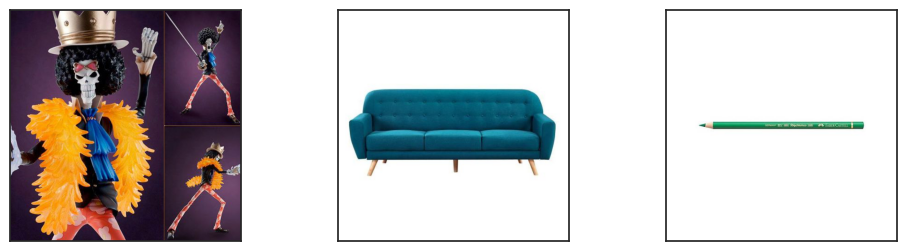

In [283]:
#sns.set_style("darkgrid")
sns.set_style("white")

id1 = 5606
id2 = 444
id3 = 27 #56115
#5606
file1 = "./datasets/image_train/image_"+str(df.loc[id1,'imageid'])+"_product_"+str(df.loc[id1,'productid'])+".jpg"
file2 = "./datasets/image_train/image_"+str(df.loc[id2,'imageid'])+"_product_"+str(df.loc[id2,'productid'])+".jpg"
file3 = "./datasets/image_train/image_"+str(df.loc[id3,'imageid'])+"_product_"+str(df.loc[id3,'productid'])+".jpg"

print(file1)
image1 = np.int64(cv2.imread(file1))
image2 = np.int64(cv2.imread(file2))
image3 = np.int64(cv2.imread(file3))

#image = np.int64(image)
print(image1.shape)

# _ = plt.imshow(image[:,:,::-1])
# _ = plt.axis("off")

_, ax = plt.subplots(1,3, figsize=(12,3))
# ax.imshow(image[:,:,::-1])#
# #ax.grid(color='w', linewidth=2)
#ax[0].set_frame_on(False)0
#ax[1].set_frame_on(True)
#ax[2].set_frame_on(True)
ax[0].imshow(image1[:,:,::-1])
ax[1].imshow(image2[:,:,::-1])
ax[2].imshow(image3[:,:,::-1])

for i in range(3):
    ax[i].grid(False)
    ax[i].set_xticks([])
    ax[i].set_yticks([])

sns.set()

In [284]:
print(image[255:265, 255:265, 0])

[[238 253 253 253 253 253 253 253 253 255]
 [255 245 255 240 225 222 249 244 251 255]
 [188 192 211 196 197 185 194 180 194 245]
 [178 191 208 198 214 196 191 171 196 243]
 [237 240 254 243 255 245 242 227 251 255]
 [255 254 255 255 255 255 255 255 255 255]
 [246 244 255 255 249 255 255 255 248 255]
 [233 187 196 213 193 230 209 206 191 199]
 [230 185 188 213 189 236 203 209 196 173]
 [241 211 242 241 236 244 215 196 226 234]]


In [285]:
### average RGB intensity for one image
meanRGB = []
for channel in range(3):
    meanRGB.append(image[:,:,channel].mean())

meanRGB

[235.395964, 234.748936, 238.893756]

### image from selected category

In [312]:
codetype = product_class[product_class['prodtype'] == 'modeles_reduits_ou_telecommandes']['prdtypecode'].values[0]
codetype

1300

In [315]:
#product_class

In [319]:
df[ df['prdtypecode'] == codetype].index

Int64Index([   24,    59,    63,    81,   104,   105,   134,   140,   146,
              153,
            ...
            84787, 84793, 84804, 84810, 84830, 84856, 84863, 84882, 84883,
            84890],
           dtype='int64', length=5045)

./datasets/image_train/image_1260268384_product_3893192098.jpg


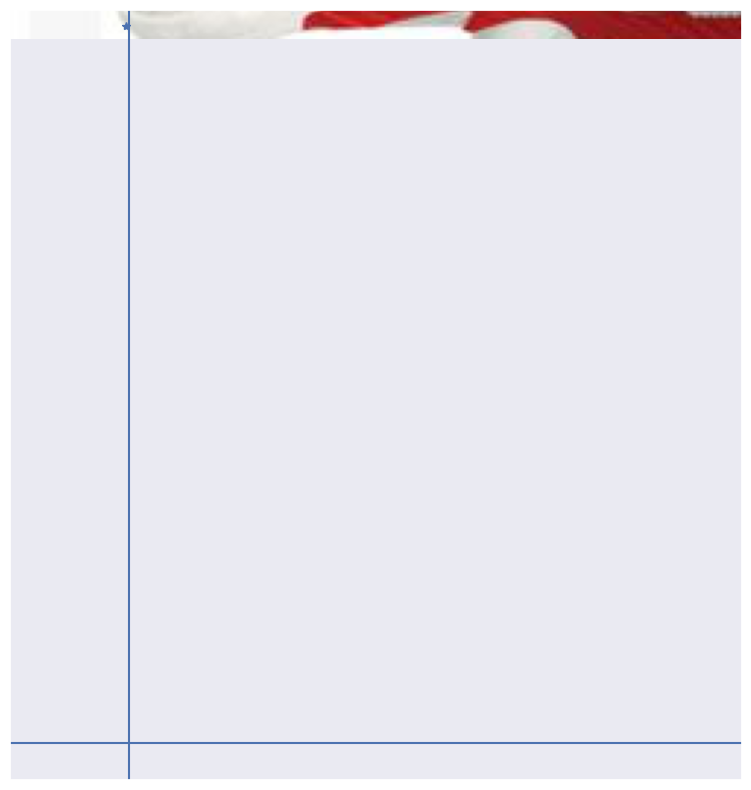

In [404]:
## verify language correctly identified for single cases:
idx = 59

## load image 
file = "./datasets/image_train/image_"+str(df.loc[idx,'imageid'])+"_product_"+str(df.loc[idx,'productid'])+".jpg"
image = np.int64(cv2.imread(file))
print(file)

#sns.set_style("white")
_, ax = plt.subplots(1,1, figsize=(10,10))
ax.imshow(image[160:170,:250,::-1])
#ax.imshow(image[:,:,::-1])
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.plot(39,5,marker = '*')
ax.axhline(y = 250)
ax.axvline(x = 40)
sns.set()


In [410]:
print(image[165,:100,1])  # along a horizontal line at level y=100, rn from x=0 to x=250 for channel = 0 

[254 255 255 253 253 255 252 247 247 247 247 247 247 247 247 247 247 247
 247 247 247 247 247 247 248 246 246 248 248 246 248 253 250 255 255 250
 253 255 250 231 215 211 211 213 215 214 213 214 213 215 217 218 218 219
 220 221 218 218 216 215 217 222 224 223 227 227 227 227 228 229 230 230
 227 227 226 225 224 224 225 226 227 227 226 226 227 227 228 229 227 228
 229 231 232 232 232 232 240 222 233 187]


./datasets/image_train/image_1307828300_product_4172827940.jpg


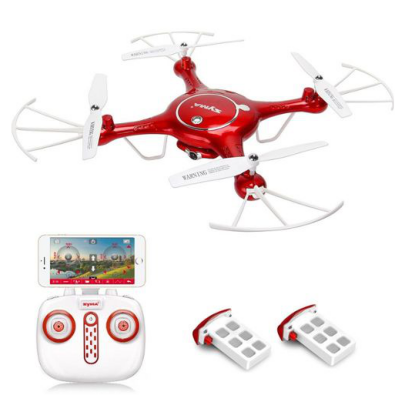

In [418]:
## verify language correctly identified for single cases:
idx = 105

## load image 
file = "./datasets/image_train/image_"+str(df.loc[idx,'imageid'])+"_product_"+str(df.loc[idx,'productid'])+".jpg"
image = np.int64(cv2.imread(file))
print(file)

#sns.set_style("white")
_, ax = plt.subplots(1,1, figsize=(5,5))
ax.imshow(image[:,:,::-1])
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
# ax.plot(39,5,marker = '*')
# ax.axhline(y = 250)
# ax.axvline(x = 40)
sns.set()


### Feature engineering: Average RGB intesity for every Image
**important:** The following cell takes >5 (<10) minutes.

In [286]:
t0 = time.time()

idx = 0

meanRGBs = []

# go thorugh all dataframe rows
for idx in range(df.shape[0]):#
    
    # construct the image file name
    file = "./datasets/image_train/image_"+str(df.loc[idx,'imageid'])+"_product_"+str(df.loc[idx,'productid'])+".jpg"

    # load image
    image = cv2.imread(file)

    # get average RGB
    avg_RGB_intensity = []
    for channel in range(3):
        avg_RGB_intensity.append(image[:,:,channel].mean())
        
    # list of all result for the whole image dataset, one image per row!
    meanRGBs.append(avg_RGB_intensity)     
    
    
t1 = time.time()
print("Measuring Mean RGB for all images takes %0.2f minutes"%((t1-t0)/60) )

Measuring Mean RGB for all images takes 8.09 minutes


In [297]:
## create new dataframe for image features
df_image = df[['prdtypecode', 'productid', 'imageid']].copy()

## save concatenated product + image id (for image retrieval)
#df_image['prod_image_id'] = [ str(productid)+'_'+str(imageid) for productid, imageid in zip(df['productid'],df['imageid']) ]

## save truple mean RGB in dataframe
df_image['meanRGB'] = meanRGBs

print(df_image.shape)
display(df_image.head())

(84916, 4)


,prdtypecode,productid,imageid,meanRGB
0,10,3804725264,1263597046,"[246.580288, 246.764924, 251.4716]"
1,2280,436067568,1008141237,"[231.392644, 232.69636, 233.71058]"
2,50,201115110,938777978,"[253.409132, 251.50082, 249.3404]"
3,1280,50418756,457047496,"[149.06524, 152.227476, 169.924608]"
4,2705,278535884,1077757786,"[238.177512, 234.072128, 225.403116]"


In [301]:
## cast to array, to extract the 3 columns as lists 
meanRGB_array = np.array(meanRGBs)
print(meanRGB_array.shape)

## Then save each channel into a new column on the Dataframe:
df_image['meanR'] = list(meanRGB_array[:,0])
df_image['meanG'] = list(meanRGB_array[:,1])
df_image['meanB'] = list(meanRGB_array[:,2])

df_image.head()

(84916, 3)


,prdtypecode,productid,imageid,meanRGB,meanR,meanG,meanB
0,10,3804725264,1263597046,"[246.580288, 246.764924, 251.4716]",246.580288,246.764924,251.471600
1,2280,436067568,1008141237,"[231.392644, 232.69636, 233.71058]",231.392644,232.696360,233.710580
2,50,201115110,938777978,"[253.409132, 251.50082, 249.3404]",253.409132,251.500820,249.340400
3,1280,50418756,457047496,"[149.06524, 152.227476, 169.924608]",149.065240,152.227476,169.924608
4,2705,278535884,1077757786,"[238.177512, 234.072128, 225.403116]",238.177512,234.072128,225.403116


In [305]:
image.shape


(500, 500, 3)

### Export iamge dataframe

In [456]:
display(df_image.head())
print(df_image.shape)


,prdtypecode,productid,imageid,meanRGB,meanR,meanG,meanB
0,10,3804725264,1263597046,"[246.580288, 246.764924, 251.4716]",246.580288,246.764924,251.471600
1,2280,436067568,1008141237,"[231.392644, 232.69636, 233.71058]",231.392644,232.696360,233.710580
2,50,201115110,938777978,"[253.409132, 251.50082, 249.3404]",253.409132,251.500820,249.340400
3,1280,50418756,457047496,"[149.06524, 152.227476, 169.924608]",149.065240,152.227476,169.924608
4,2705,278535884,1077757786,"[238.177512, 234.072128, 225.403116]",238.177512,234.072128,225.403116


(84916, 7)


In [459]:
write = True
if write:
    filename = 'df_image_preprocessed' + '.csv'
    df_image.to_csv(filename, header=True, index=False)

In [458]:
read = False
if read:
    df_test = pd.read_csv(filename)
    display(df_test.head())

### vectorize and flatten images

In [441]:
arr = np.array([10,10,10,10,8,5,4, 5, 4, 4,5,7,8,10,10,9,8,7,10,10])

print(len(arr))

x = np.where(arr < 10)

print(type(x[0]))
print(x[0])
#print("min=",min(x[0]),"  max=",max(x[0]))
print("min=",x[0][0],"  max=",x[0][-1])
print()

print(arr[2],arr[17])


20
<class 'numpy.ndarray'>
[ 4  5  6  7  8  9 10 11 12 15 16 17]
min= 4   max= 17
min= 4   max= 17

10 7


In [453]:

Nch = image.shape[2]
Npy = image.shape[1]
Npx = image.shape[0]

x_left_edge = []

for ch in range(1):#
    
    for rw in range(2):#Npx
        
        row = image[rw, :, ch]
        
        print(ch, rw, row)
        
        x_limit = np.where(row < 235 )
        print(x_limit[0])
        
#        if len(x_limit[0])>0:
        x_left_edge.append(x_limit[0][0])
        x_right_edge.append(x_limit[0][-1])
        
        
print(len(x_left_edge))
        


0 0 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 25

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
t0 = time.time()

idx = 0

vector = []

# go thorugh all dataframe rows
for idx in range(10):#df.shape[0]
    
    # construct the image file name
    file = "./datasets/image_train/image_"+str(df.loc[idx,'imageid'])+"_product_"+str(df.loc[idx,'productid'])+".jpg"

    # load image
    image = cv2.imread(file)

    # crop image (return square image)
    
    # reshape channels
    
    # list of all result for the whole image dataset, one image per row!
    meanRGBs.append(avg_RGB_intensity)     
    
    
t1 = time.time()
print("Measuring Mean RGB for all images takes %0.2f minutes"%((t1-t0)/60) )

### Aggregate by category
* average channel value per category (average of means)

In [135]:
RGB_per_cat = df[['prdtypecode','meanR','meanG','meanB']].groupby('prdtypecode')['meanR','meanG','meanB'].mean()

RGB_per_cat.head()

C:\Users\19rod\AppData\Local\Temp\ipykernel_1936\1170035404.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  RGB_per_cat = df[['prdtypecode','meanR','meanG','meanB']].groupby('prdtypecode')['meanR','meanG','meanB'].mean()


,meanR,meanG,meanB
prdtypecode,,,
10,181.446701,189.668004,196.518350
40,179.766862,183.619281,188.988801
50,195.407933,196.199174,198.779796
60,188.787452,189.281102,192.768904
1140,191.740965,195.193835,200.828538


**Visualisation**

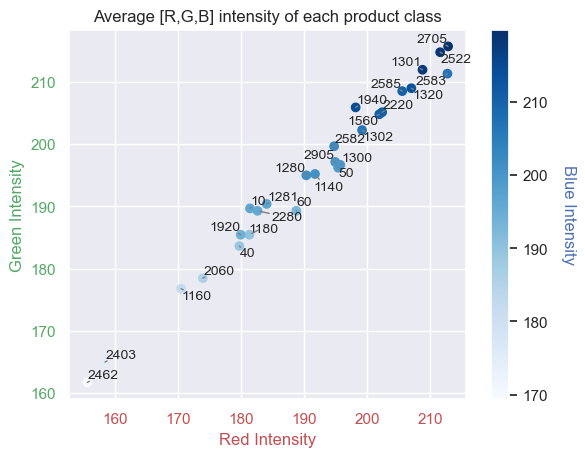

In [363]:
from adjustText import adjust_text

red_values = RGB_per_cat['meanR'].values
green_values = RGB_per_cat['meanG'].values
blue_values = RGB_per_cat['meanB'].values

# Scatter plot
import matplotlib.cm as cm
plt.scatter(red_values, green_values, c=blue_values, cmap="Blues")
#plt.scatter(green_values, blue_values, c=red_values)
#plt.scatter(blue_values, red_values, c=green_values)

#Create a list of text annotations
image_names = RGB_per_cat.index
annotations = []
for i, name in enumerate(image_names):
    annotations.append(plt.text(red_values[i], green_values[i], name, fontsize=10))

# Adjust the text labels to avoid overlap
adjust_text(annotations, arrowprops=dict(arrowstyle='-', color='grey'))

plt.title('Average [R,G,B] intensity of each product class')
plt.xlabel('Red Intensity', color = 'r')
plt.ylabel('Green Intensity', color = 'g')
cbar = plt.colorbar()
cbar.ax.set_ylabel('Blue Intensity', rotation=270, labelpad = 20, fontdict = {"size":12}, color = 'b')

plt.tick_params(axis='x', colors='r')
plt.tick_params(axis='y', colors='g')
plt.show();

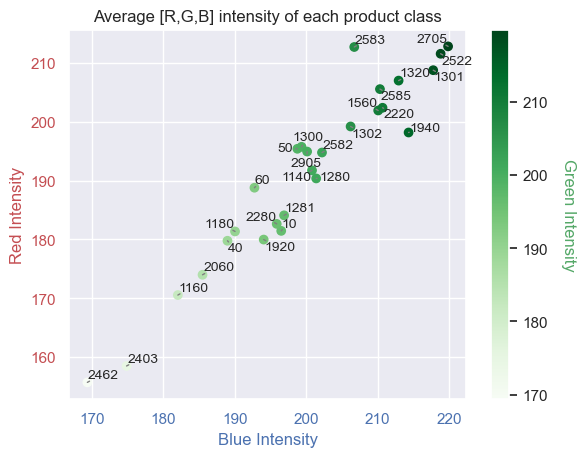

In [365]:
from adjustText import adjust_text

red_values = RGB_per_cat['meanR'].values
green_values = RGB_per_cat['meanG'].values
blue_values = RGB_per_cat['meanB'].values

# Scatter plot
import matplotlib.cm as cm
plt.scatter(blue_values, red_values, c=blue_values, cmap="Greens")
# plt.scatter(green_values, blue_values, c=red_values)
# plt.scatter(blue_values, red_values, c=green_values)

#Create a list of text annotations
image_names = RGB_per_cat.index
annotations = []
for i, name in enumerate(image_names):
    annotations.append(plt.text(blue_values[i], red_values[i], name, fontsize=10))

# Adjust the text labels to avoid overlap
adjust_text(annotations, arrowprops=dict(arrowstyle='-', color='grey'))

plt.title('Average [R,G,B] intensity of each product class')
plt.xlabel('Blue Intensity', color = 'b')
plt.ylabel('Red Intensity', color = 'r')
cbar = plt.colorbar()
cbar.ax.set_ylabel('Green Intensity', rotation=270, labelpad = 20, fontdict = {"size":12}, color = 'g')

plt.tick_params(axis='x', colors='b')
plt.tick_params(axis='y', colors='r')
plt.show();

**Color Distributions**

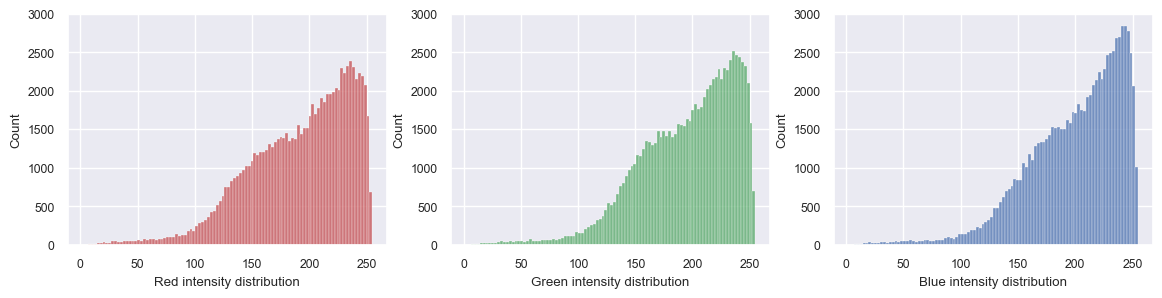

In [199]:
sns.set(font_scale = 0.8)
ylim = 3000

fig, axs = plt.subplots(1,3,figsize=(14,3) )
#fig.suptitle("Average image RGB intensities distributions")

sns.histplot(df.meanR, bins = 100, ax = axs[0], color = 'r').set(ylim=(0, ylim))
axs[0].set_xlabel("Red intensity distribution")
sns.histplot(df.meanG, bins = 100, ax = axs[1], color = 'g').set(ylim=(0, ylim))#, yticklabels=[], ylabel=None
axs[1].set_xlabel("Green intensity distribution")
sns.histplot(df.meanB, bins = 100, ax = axs[2], color = 'b').set(ylim=(0, ylim))
axs[2].set_xlabel("Blue intensity distribution")
#axs[0].set_title("Average image Red intensity distribution")
sns.set()


ANOVA test

In [367]:
H0 = "There is NO correlation between 'avgB' and 'prdtypecode'"
H1 = "There is a correlation between  'avgB' and 'prdtypecode'"

In [370]:
# Import the library
import statsmodels.api

## Realize the ANOVA test and display the results
## Try 'title_char_len', 'descr_char_len' or 'text_token_len'
result = statsmodels.formula.api.ols('meanB ~ prdtypecode', data=df).fit()
table = statsmodels.api.stats.anova_lm(result)

# get p-val an evaluate criteria
display(table)
p_val_anova = table.loc['prdtypecode','PR(>F)']

# evaluation
alpha = 0.05
def p_val_evaluation(p_val, alpha):
    if p_val >= alpha:
        print("H0 is not rejected")
    else:
        print("H0 is rejected, H1 is accepted")

p_val_evaluation(p_val_anova,alpha)
print("ANOVA p-value = ", p_val_anova)

,df,sum_sq,mean_sq,F,PR(>F)
prdtypecode,1.0,4.471114e+05,447111.354299,268.284003,3.322226e-60
Residual,84914.0,1.415143e+08,1666.559877,NaN,NaN


H0 is rejected, H1 is accepted
ANOVA p-value =  3.322226178397936e-60


**Barplot**

In [130]:
RGB_per_cat.reset_index(inplace=True)
RGB_per_cat.head()


,prdtypecode,meanR,meanG,meanB
0,10,181.446701,189.668004,196.518350
1,40,179.766862,183.619281,188.988801
2,50,195.407933,196.199174,198.779796
3,60,188.787452,189.281102,192.768904
4,1140,191.740965,195.193835,200.828538


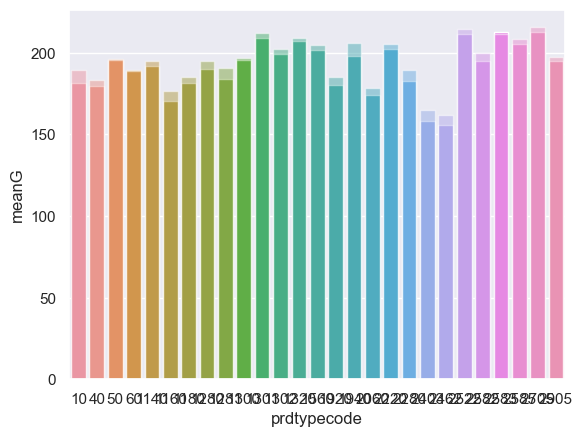

In [134]:
sns.barplot(data=RGB_per_cat, x="prdtypecode", y="meanR")
sns.barplot(data=RGB_per_cat, x="prdtypecode", y="meanG", alpha = 0.5);

In [406]:
xx = RGB_per_cat['meanR'].values
yy = RGB_per_cat['meanG'].values
zz = RGB_per_cat['meanB'].values

from mpl_toolkits.mplot3d import Axes3D
#sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(6,6))

ax = Axes3D(fig) # Method 1
ax.scatter(xx, yy, zz)

<Figure size 600x600 with 0 Axes>

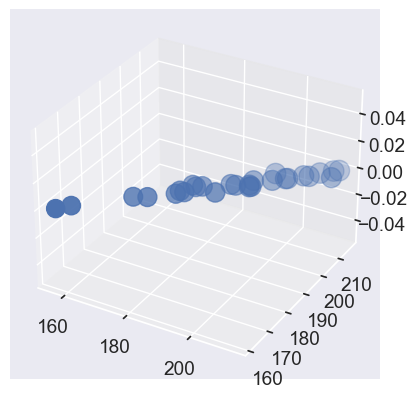

In [408]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.scatter(xx,yy,zz)

C:\Users\19rod\AppData\Local\Temp\ipykernel_13440\915187073.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(xx,yy,cmap='rgb')


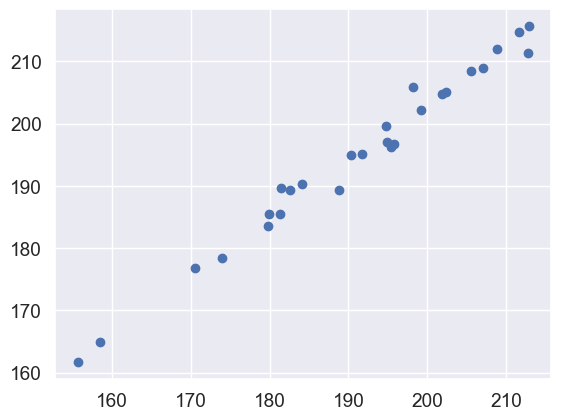

In [423]:
plt.scatter(xx,yy)
#plt.scatter(yy[i],zz[i])
#plt.scatter(xx[i],zz[i])

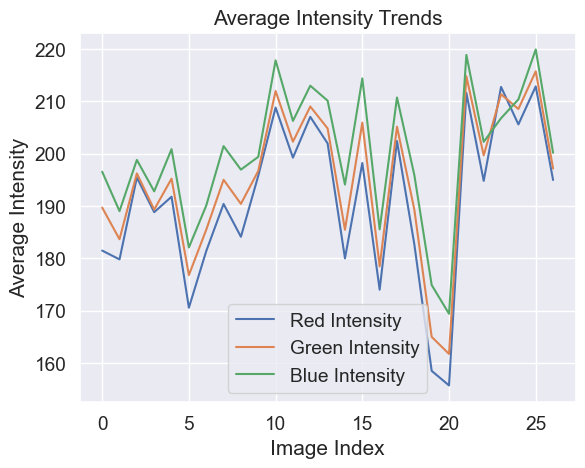

In [424]:
# Line plot
red_values = xx
green_values = yy
blue_values = zz

plt.plot(red_values, label='Red Intensity')
plt.plot(green_values, label='Green Intensity')
plt.plot(blue_values, label='Blue Intensity')
plt.xlabel('Image Index')
plt.ylabel('Average Intensity')
plt.legend()
plt.title('Average Intensity Trends')

# Display the plot
plt.show()

## Todos for images.  
* avg_blue, same for red and green-------------> for each produc
* df[red, blue, grenn]  80K


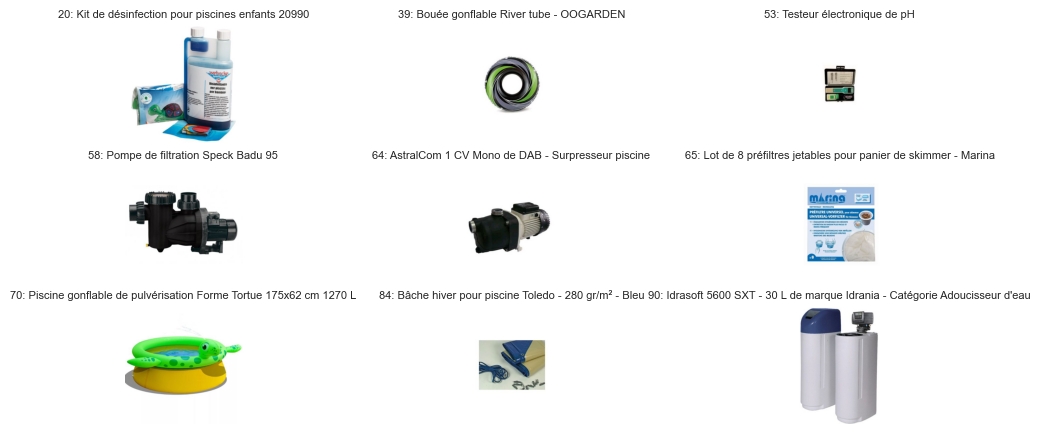

In [241]:
nb_items = 9

fig = plt.figure(figsize=(12, 7))

columns = 3
rows = len( cat2583.head(nb_items).index ) //columns + 1
path = "./datasets/image_train/image_"

for i,idx in enumerate(cat2583.head(nb_items).index):
    file = path + str(cat2583.loc[idx,'imageid'])+"_product_"+str(cat2583.loc[idx,'productid'])+".jpg"
    
    img = cv2.imread(file)
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img[:,:,::-1])
    plt.axis("off")
    plt.title(str(idx)+": "+cat2583.loc[idx,'title'], size=8, wrap = True)
    #plt.title("\n".join(wrap( str(idx)+": "+cat2583.loc[idx,'title'], 50)), size=8)
    
plt.show()
